# AiiA Glove

In [4]:
#%pip install scikit-learn
#%pip install nltk
#%pip install numpy
#%pip install pandas
#%pip install seaborn
#%pip install matplotlib
#%pip install spacy
#%pip install autocorrect

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#Text processing
import nltk
import string
import re

import warnings

warnings.filterwarnings('ignore')


In [4]:
#%pip install openpyxl --upgrade

In [5]:
df = pd.read_excel("Group1-Copy1.xlsx", index_col = 0)
df

,ReceiverID,ActionType,NegoOutcome,Content
SenderID,,,,
70,69,Offer,FinalAccept,"Dear Mr. Mendel, \nHope you are doing well! \n..."
69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for reaching out t..."
70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank your kind response – ..."
69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for your swift rep..."
70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank you for your proposal..."
...,...,...,...,...
851,856,Counteroffer,FinalReject,"Dear Chis Meyer,\n \nthank you for your latest..."
856,851,Counteroffer,FinalReject,"Dear Alex Kramer,\nthank you very much for you..."
851,856,Counteroffer,FinalReject,"Dear Chris Meyer,\nthank you for your fast ans..."


In [6]:
df.isnull().sum()

ReceiverID     0
ActionType     0
NegoOutcome    0
Content        0
dtype: int64

In [7]:
#Anzhal der Zeichen

df['Length'] = df['Content'].str.len()
df.head(10)

,ReceiverID,ActionType,NegoOutcome,Content,Length
SenderID,,,,,
70,69,Offer,FinalAccept,"Dear Mr. Mendel, \nHope you are doing well! \n...",2529
69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for reaching out t...",2579
70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank your kind response – ...",2336
69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for your swift rep...",1961
70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank you for your proposal...",1917
69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nVisiting Slovenia would be l...",1759
70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nGreat, we are already looki...",1105
70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank you for your message ...",413
69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nUnfortunately I have a bit o...",935


In [8]:
#WordCount

def word_count(content):
    content_list = content.split()
    return len(content_list)

df['Word count of nego message'] = df['Content'].apply(word_count)

df.head(10)

,ReceiverID,ActionType,NegoOutcome,Content,Length,Word count of nego message
SenderID,,,,,,
70,69,Offer,FinalAccept,"Dear Mr. Mendel, \nHope you are doing well! \n...",2529,429
69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for reaching out t...",2579,439
70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank your kind response – ...",2336,409
69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for your swift rep...",1961,345
70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank you for your proposal...",1917,343
69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nVisiting Slovenia would be l...",1759,296
70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nGreat, we are already looki...",1105,196
70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank you for your message ...",413,78
69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nUnfortunately I have a bit o...",935,157


In [9]:
df['NegoOutcome'].value_counts()

NegoOutcome
FinalAccept    1604
FinalReject     728
Name: count, dtype: int64

In [10]:
accepted_messages = df[df['NegoOutcome']=='FinalAccept']['Content']
accepted_messages.values[1]

"Dear Mr. Novak, \nThank you for reaching out to me!I apologize for the slight delay in getting back to you, my colleagues and I are in the midst of preparing for our upcoming joint venture and we couldn't be more excited! As you already know, my name is Finn Mendel and I will be your correspondence for this period of time of solidifying the agreements between Hurm AG and SVN Tech respectively. \nI have read your proposal for the open issues of our joint venture, however I have some thoughts on what you have discussed. Below is my explanation:\xa0 \n \n Directors \n \nWhile we have agreed on the 5 members with a simple majority power, we believe having 4 members from Hurm AG will be more suitable for this venture. This is because our directors are extremely experienced and have completed multiple joint ventures before with other European countries. However, we will need 1 from SVN Tech for, as you mentioned previously, to deal with local authorities and partners successfully.\xa0 \n \n

In [11]:
rejected_messages = df[df['NegoOutcome']=='FinalReject']['Content']
rejected_messages.values[1]

'Dear Mr Novak, \nI am pleased to hear that you are happy about the joint venture because so are we at Hurm AG. I would like to thank you in advance for stipulating your points of discussion for us to make this partnership a reality. \nIn regards to the "board of directors", I would like Hurm AG to have 4 seats in the board. Since it is important for our company to carry the vision of our company throughout the project till its final stage of course with the help of SVN Tech representative in the board to provide the support and knowhow to realize our vision. \nIn regards to our engineers stay in Slovenia, it is impossible for them to stay that long due to their production commitments here Switzerland to ensure the success of our joint project. If needed, our engineers can stay in Slovenia for a maximum of 6 months to help to start the project and eventually train the staff. As for the additional compensation of the workers I do agree with the 15% paid by SVN proposed by you. \nFor the

In [12]:
from sklearn import preprocessing

df['NegoOutcomeLabel'] = df.NegoOutcome.map({'FinalReject': 0, 'FinalAccept': 1})
df.head()
df.tail()

,ReceiverID,ActionType,NegoOutcome,Content,Length,Word count of nego message,NegoOutcomeLabel
SenderID,,,,,,,
851,856,Counteroffer,FinalReject,"Dear Chis Meyer,\n \nthank you for your latest...",1755,338,0
856,851,Counteroffer,FinalReject,"Dear Alex Kramer,\nthank you very much for you...",1460,263,0
851,856,Counteroffer,FinalReject,"Dear Chris Meyer,\nthank you for your fast ans...",673,133,0
856,851,Counteroffer,FinalReject,"Dear Alex Kramer,\nI am still very interested ...",969,171,0
851,856,FinalReject,FinalReject,"Dear Chris Meyer,\n \nI'm so sorry but I can n...",276,54,0


In [13]:
#%pip install wordcloud

Text(0.5, 1.0, 'Rejected Messages')

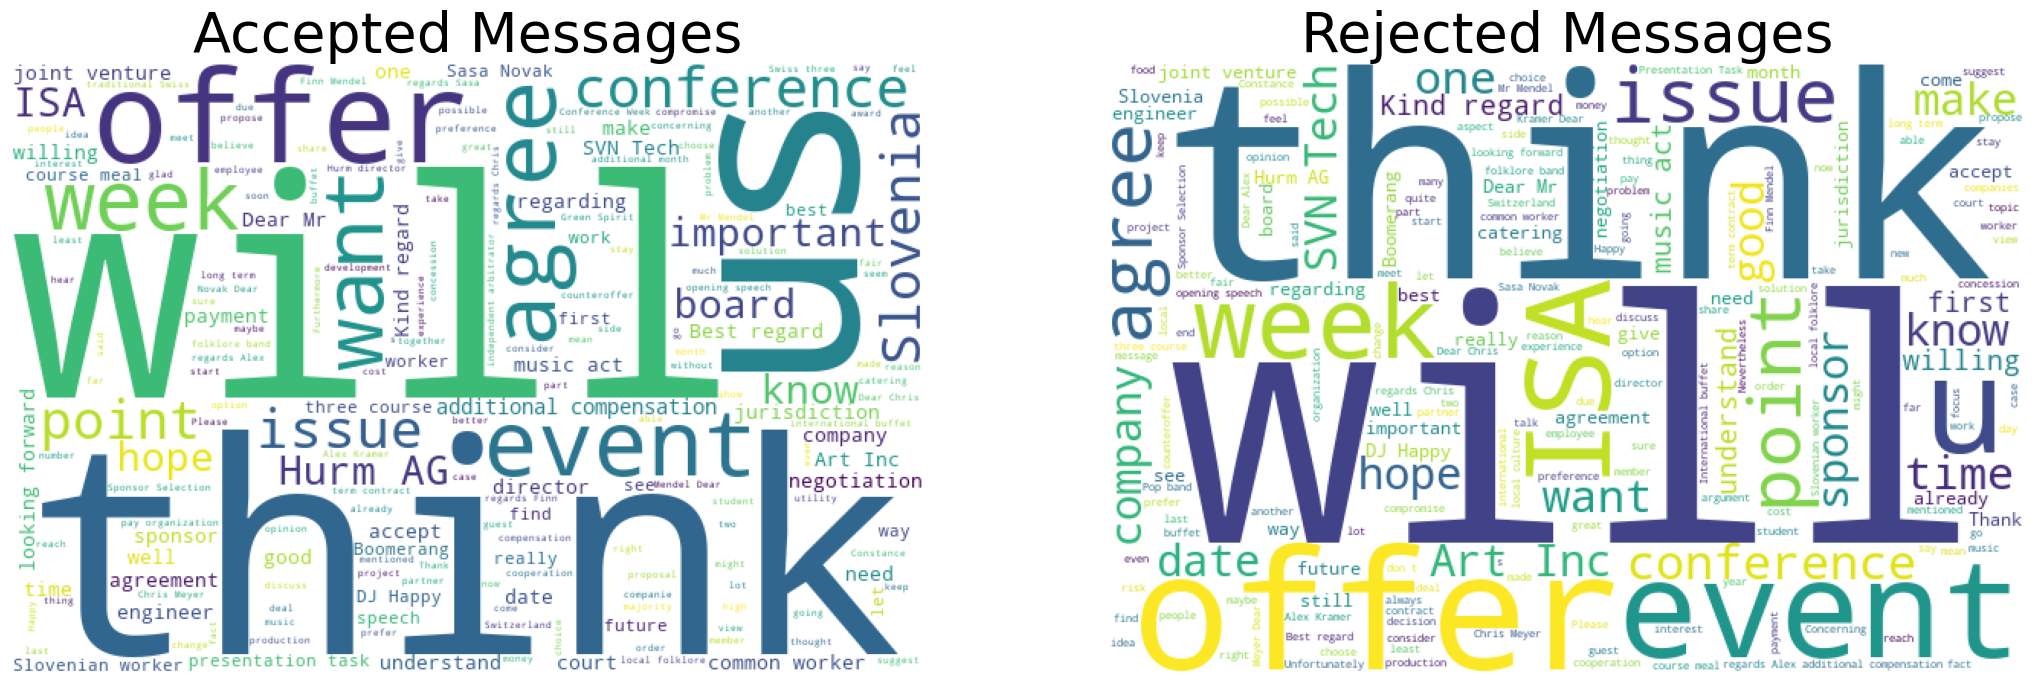

In [14]:
from wordcloud import WordCloud

fig, (ax1, ax2) = plt.subplots(1,2, figsize=[26,8])

wordcloud1 = WordCloud(background_color = 'white', width=600, 
                       height= 400).generate(" ".join(accepted_messages))

ax1.imshow(wordcloud1)
ax1.axis("off")
ax1.set_title('Accepted Messages', fontsize= 40)

wordcloud2 = WordCloud(background_color = 'white', width=600, 
                       height= 400).generate(" ".join(rejected_messages))

ax2.imshow(wordcloud2)
ax2.axis("off")
ax2.set_title('Rejected Messages', fontsize= 40)

In [15]:
# Compare average word count between outcomes
accepted_word_count = df[df['NegoOutcome'] == 'FinalAccept']['Word count of nego message']
rejected_word_count = df[df['NegoOutcome'] == 'FinalReject']['Word count of nego message']

print("Average Word Count - Accepted:", accepted_word_count.mean())
print("Average Word Count - Rejected:", rejected_word_count.mean())


Average Word Count - Accepted: 219.2568578553616
Average Word Count - Rejected: 256.50274725274727


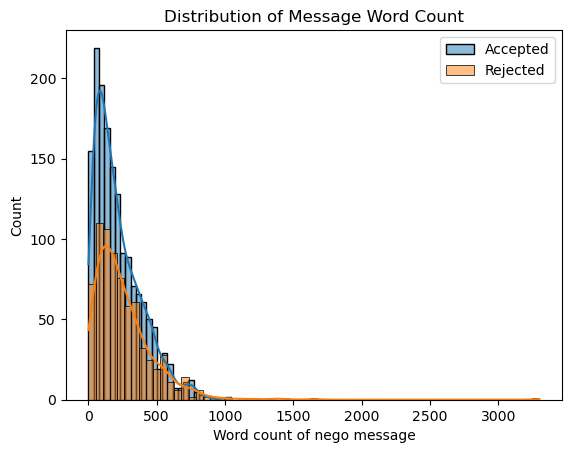

In [16]:
sns.histplot(accepted_word_count, label='Accepted', kde=True, alpha=0.5)
sns.histplot(rejected_word_count, label='Rejected', kde=True, alpha=0.5)
plt.legend()
plt.title("Distribution of Message Word Count")
plt.show()


In [17]:
#%pip install TextBlob

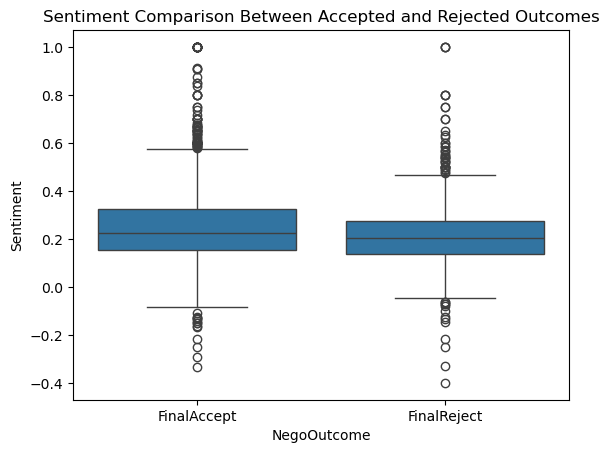

In [18]:
from textblob import TextBlob

df['Sentiment'] = df['Content'].apply(lambda x: TextBlob(x).sentiment.polarity)

sns.boxplot(x='NegoOutcome', y='Sentiment', data=df)
plt.title('Sentiment Comparison Between Accepted and Rejected Outcomes')
plt.show()


In [19]:
#Mehr zum data cleansing namen entfernenwie unten zu sehen name entity recogntion and mr and mrs

## Preprocessing

In [20]:
all_messages = df['Content']
all_messages

SenderID
70     Dear Mr. Mendel, \nHope you are doing well! \n...
69     Dear Mr. Novak, \nThank you for reaching out t...
70     Dear Mr. Mendel, \nThank your kind response – ...
69     Dear Mr. Novak, \nThank you for your swift rep...
70     Dear Mr. Mendel, \nThank you for your proposal...
                             ...                        
851    Dear Chis Meyer,\n \nthank you for your latest...
856    Dear Alex Kramer,\nthank you very much for you...
851    Dear Chris Meyer,\nthank you for your fast ans...
856    Dear Alex Kramer,\nI am still very interested ...
851    Dear Chris Meyer,\n \nI'm so sorry but I can n...
Name: Content, Length: 2332, dtype: object

In [21]:
def clean_text(message):
    #lowercasing
    message = message.lower()

    message = re.sub('\[.*?\]', '', message)
    message = re.sub('https?://\S+|www\.\S+', '', message)
    message = re.sub('<.*?>+', '', message)
    message = re.sub('[%s]' % re.escape(string.punctuation), '', message)
    message = re.sub('\n', '', message)
    message = re.sub('\w*\d\w*', '', message)
    
    return message

In [22]:
df['Content'] = df['Content'].apply(lambda x: clean_text(x))
df['Content'].head()

SenderID
70    dear mr mendel hope you are doing well as the ...
69    dear mr novak thank you for reaching out to me...
70    dear mr mendel thank your kind response – no n...
69    dear mr novak thank you for your swift reply i...
70    dear mr mendel thank you for your proposal and...
Name: Content, dtype: object

In [23]:
def remove_greetings_and_closings(text):
    # Regex for common greetings and closings
    greetings = r"^(dear (mr|mrs|ms|dr|prof)\.?\s?\w+,?)"
    closings = r"(best regards|yours sincerely|thank you|kind regards|regards|cheers),?"
    # Remove greetings and closings
    text = re.sub(greetings, '', text, flags=re.IGNORECASE)
    text = re.sub(closings, '', text, flags=re.IGNORECASE)
    return text.strip()

df['Content'] = df['Content'].apply(remove_greetings_and_closings)



Here a function is created to remove common greetings and closings from text messages. These elements can be redundant in text analysis and may negatively impact model performance, as they do not add valuable information for the actual modell. Thats why, these parts of the text should be removed to enable more accurate analysis.

The function remove_greetings_and_closings(text) performs the following steps:
 1. Searches for typical greetings (e.g., "Dear Mr. Smith,").
 2. Searches for typical closings (e.g., "Best regards," or "Yours sincerely,").
 3. Removes these greetings and closings from the text to clean it for further analysis.

In [25]:
#Also the model en_core_web_sm is needed that it works
#(en_core_web_sm is a small English model used for named entity recognition and other NLP tasks)
#!python -m spacy download en_core_web_sm

In [26]:
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def remove_named_entities(text):
    doc = nlp(text)
    tokens = [token.text for token in doc if not token.ent_type_]
    return " ".join(tokens)

df['Content'] = df['Content'].apply(remove_named_entities)


This creates a function that removes named entities (such as names of people, organizations,
locations, etc.) from text messages. Named entities can be irrelevant for certain analyses, so removing them
can help improve model accuracy and focus on the more meaningful aspects of the text.

In [27]:
df['Content'].head()

SenderID
70    hope you are doing well as the management of b...
69    for reaching out to mei apologize for the slig...
70    r kind response – no need to hurry i guess we ...
69    for your swift reply i have read your set of p...
70    for your proposal and your efforts so far it s...
Name: Content, dtype: object

In [29]:
#(Dauert lange)
from autocorrect import Speller

spell = Speller(lang='en')

df['Content'] = df['Content'].apply(lambda x: " ".join([spell(word) for word in x.split()]))
df['Content']

SenderID
70     hope you are doing well as the management of b...
69     for reaching out to mei apologize for the slig...
70     r kind response – no need to hurry i guess we ...
69     for your swift reply i have read your set of p...
70     for your proposal and your efforts so far it s...
                             ...                        
851    dear this meyer for your latest offer and some...
856    dear very much for your latest offer i am happ...
851    dear for your fast answer i am happy that we h...
856    dear still very interested in coming to a join...
851    dear i m so sorry but i can not accept this th...
Name: Content, Length: 2332, dtype: object

Here we create a function to correct spelling mistakes in text messages.
Previous analysis revealed that the text contains spelling errors, which can negatively affect text analysis
and model performance. Therefore, I want to ensure the text is free of spelling mistakes to improve the accuracy of
further analysis and predictions.


In [30]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df['Content'] = df['Content'].apply(lemmatize_text)

In this step, we apply lemmatization to the text to change words into their base or dictionary form (called a lemma). This makes sure that different forms of a word are treated the same when analyzing the text, which helps improve the model’s accuracy. For example, words like “running” or “ran” will be changed to “run”, and “better” or “best” will be changed to “good”. Lemmatization helps to make the text more consistent and easier to analyze.


In [31]:
df['Content']

SenderID
70     hope you are doing well a the management of bo...
69     for reaching out to mei apologize for the slig...
70     r kind response – no need to hurry i guess we ...
69     for your swift reply i have read your set of p...
70     for your proposal and your effort so far it se...
                             ...                        
851    dear this meyer for your latest offer and some...
856    dear very much for your latest offer i am happ...
851    dear for your fast answer i am happy that we h...
856    dear still very interested in coming to a join...
851    dear i m so sorry but i can not accept this th...
Name: Content, Length: 2332, dtype: object

In [32]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
df['Content'] = df['Content'].apply(lambda x:tokenizer.tokenize(x))
df['Content'].head()

SenderID
70    [hope, you, are, doing, well, a, the, manageme...
69    [for, reaching, out, to, mei, apologize, for, ...
70    [r, kind, response, no, need, to, hurry, i, gu...
69    [for, your, swift, reply, i, have, read, your,...
70    [for, your, proposal, and, your, effort, so, f...
Name: Content, dtype: object

In this step, we use tokenization to break the text into individual words or tokens. This helps the model understand and work with smaller, meaningful parts of the text. The tokenizer we’re using looks for sequences of letters, numbers, and underscores, which means it will separate words and ignore punctuation.

In [33]:
import nltk
#nltk.download('stopwords')

In [34]:
from nltk.corpus import stopwords

stopwords_en = stopwords.words('english')
print(stopwords_en)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [35]:
from nltk.corpus import stopwords

def remove_stopwords(text):
    words= [w for w in text if w not in stopwords.words('english')]
    return words
    
df['Content'] = df['Content'].apply(lambda x:remove_stopwords(x))
df['Content'].head()

SenderID
70    [hope, well, management, company, agreed, buil...
69    [reaching, mei, apologize, slight, delay, gett...
70    [r, kind, response, need, hurry, guess, face, ...
69    [swift, reply, read, set, proposal, discussed,...
70    [proposal, effort, far, seems, getting, close,...
Name: Content, dtype: object

In this step, we remove stopwords from the text. Stopwords are common words like "and", "the", "is", etc., that don't add much meaning in text analysis. By removing them, we can focus on the more important words in the text, which can help improve the accuracy of our analysis and model.

In [36]:
tokenizer = nltk.tokenize.TreebankWordTokenizer()

In [37]:
import nltk
#nltk.download('wordnet')

In [38]:
def combine_text(list_of_text):
    combined_text = ' '.join(list_of_text)
    return combined_text

df['Content'] = df['Content'].apply(lambda x: combine_text(x))
df['Content']

SenderID
70     hope well management company agreed building f...
69     reaching mei apologize slight delay getting ba...
70     r kind response need hurry guess face daily fi...
69     swift reply read set proposal discussed collea...
70     proposal effort far seems getting close resolv...
                             ...                        
851    dear meyer latest offer point completely let u...
856    dear much latest offer happy could already rea...
851    dear fast answer happy found solution issue ne...
856    dear still interested coming joint result neve...
851    dear sorry accept less understand argument lik...
Name: Content, Length: 2332, dtype: object

Here we combine the text back into a single string after it has been split into individual words or tokens. This is important because we may have split the text into tokens (words) during previous steps, but now we want to join them back together to form the full text again.

In [39]:
corpus =[]
new = df['Content'].str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]
corpus

['hope',
 'well',
 'management',
 'company',
 'agreed',
 'building',
 'fruitful',
 'partnership',
 'face',
 'upcoming',
 'disruption',
 'market',
 'best',
 'innovation',
 'green',
 'spirit',
 'would',
 'like',
 'introduce',
 'nasa',
 'nova',
 'reaching',
 'tighten',
 'general',
 'term',
 'harm',
 'ag',
 'established',
 'round',
 'discussion',
 'far',
 'please',
 'find',
 'attached',
 'proposal',
 'open',
 'issue',
 'joint',
 'venture',
 'would',
 'like',
 'explain',
 'following',
 'director',
 'would',
 'like',
 'address',
 'unsolved',
 'issue',
 'number',
 'director',
 'sent',
 'since',
 'agreed',
 'decisionmaking',
 'committee',
 'consisting',
 'member',
 'simple',
 'majority',
 'power',
 'strongly',
 'suggest',
 'dividing',
 'seat',
 'svn',
 'tech',
 'would',
 'able',
 'deal',
 'local',
 'authority',
 'partner',
 'successfully',
 'using',
 'strong',
 'local',
 'network',
 'relationship',
 'engineer',
 'develop',
 'thorough',
 'convenient',
 'product',
 'sharing',
 'experience',
 'si

Lastly we are creating a corpus, which is a collection of all the words from the text data. A corpus is useful because it gives us a list of all the words across all the text entries, which can be used for further analysis like word frequency counting or building a vocabulary.

In [40]:
len(corpus)

237739

# BOW

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
count_vectorizer = CountVectorizer()
message_vector = count_vectorizer.fit_transform(df['Content'])
message_vector

<2332x6616 sparse matrix of type '<class 'numpy.int64'>'
	with 174150 stored elements in Compressed Sparse Row format>

In [44]:
message_array = message_vector.toarray()
df_countvectorizer = pd.DataFrame(data=message_array, columns=count_vectorizer.get_feature_names_out())
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [45]:
df_countvectorizer.columns

Index(['abandon', 'abandoned', 'abandoning', 'abdicate', 'aber', 'abiding',
       'ability', 'able', 'abort', 'aboutthe',
       ...
       'zeroemission', 'zurich', 'zürich', 'áafter', 'ánd', 'íteams', 'óf',
       'ülan', 'šimi', 'šmic'],
      dtype='object', length=6616)

In [46]:
count_vectorizer_ngrams = CountVectorizer(ngram_range=(1,2), min_df = 0.01, max_df=0.7, max_features=100)
message_vectors_ngrams= count_vectorizer_ngrams.fit_transform(df['Content'])

In [47]:
message_ngrams_array = message_vectors_ngrams.toarray()
df_countvectorizer_ngrams = pd.DataFrame(data=message_ngrams_array, columns = count_vectorizer_ngrams.get_feature_names_out())
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(df['Content'])
tfidf_message_vector= tfidf_vectorizer.transform(df['Content'])

tfidf_message_vector.shape

(2332, 6616)

In [49]:
message_tfidf_array = tfidf_message_vector.toarray()
df_tfidf = pd.DataFrame(data=message_tfidf_array, columns= tfidf_vectorizer.get_feature_names_out())
print(df_tfidf)

      abandon  abandoned  abandoning  abdicate  aber  abiding  ability  \
0         0.0        0.0         0.0       0.0   0.0      0.0      0.0   
1         0.0        0.0         0.0       0.0   0.0      0.0      0.0   
2         0.0        0.0         0.0       0.0   0.0      0.0      0.0   
3         0.0        0.0         0.0       0.0   0.0      0.0      0.0   
4         0.0        0.0         0.0       0.0   0.0      0.0      0.0   
...       ...        ...         ...       ...   ...      ...      ...   
2327      0.0        0.0         0.0       0.0   0.0      0.0      0.0   
2328      0.0        0.0         0.0       0.0   0.0      0.0      0.0   
2329      0.0        0.0         0.0       0.0   0.0      0.0      0.0   
2330      0.0        0.0         0.0       0.0   0.0      0.0      0.0   
2331      0.0        0.0         0.0       0.0   0.0      0.0      0.0   

          able  abort  aboutthe  ...  zeroemission  zurich    zürich  áafter  \
0     0.042429    0.0       0.0

In [50]:
#%pip install scipy==1.12

# Embedding mit Glove
Pretrained Glove

In [53]:
# Install gensim for pretrained GloVe embeddings
#!pip install gensim
#It focuses on global word co-occurrence statistics, which means it captures how often words appear together in the same context across an entire corpus.
#Similar words (e.g., king and queen) have embeddings (vectors) that are close to each other in the vector space.
#word embedding technique, not a bag-of-words method. It creates dense vector representations of words that capture 
#semantic meaning and relationships.

In [54]:
import gensim.downloader as api  # To load pretrained GloVe embeddings
import pandas as pd
import numpy as np

In [55]:
# Downloading and loading pretrained GloVe embeddings
# Dimensionality (100-dimensional embeddings)
glove_model = api.load("glove-wiki-gigaword-100")  # Optionen 50, 100, 200, 300 Testing with 100

# Print a sample word embedding
print(glove_model['negotiation'])


[-0.023566  -0.28326   -0.11461    0.71741   -0.52878   -0.61264
  0.34418    0.013459   0.33007   -0.19974    0.47806    0.10249
  0.87942   -0.12501   -0.21185    0.09105   -0.72754   -0.23456
 -0.08657   -0.6022    -0.20408    0.091489  -0.17364   -0.53197
  0.10374   -0.10677    0.065824  -0.28555   -0.26143   -0.56023
 -1.2523     0.095917   0.053514  -0.60153    0.47238    0.29847
  0.061921  -0.63153    0.16292   -0.77674   -0.62589   -0.028247
  0.3849    -0.12315   -0.70743   -0.63185   -0.49232    0.0037925
 -0.16448    0.030472   0.058827  -0.0084547 -0.59597    1.0577
  0.27584   -1.0869     0.020058  -0.56214    0.61056    0.47549
 -0.62464   -0.27904   -0.59627   -0.59679    0.5589    -0.039583
  0.039277   0.43853   -0.10758   -0.778      0.28015   -0.47566
  0.27214   -0.50856   -0.11679    0.24685   -0.91272   -0.51724
 -1.2031    -0.21802    0.2639     0.5568     0.48627    0.042529
 -1.0337     1.2108     0.25717    0.45926    0.51008   -0.85933
 -0.38921    0.21701 

In [56]:
#The model is now ready for use. Each word has a 100-dimensional vector.

In [57]:
# Function to generate an average embedding for a sentence/document
def get_glove_embeddings(text, model):
    """
    Convert a text (sentence) into an average GloVe embedding.
    - text: str, the input text.
    - model: gensim GloVe model.
    
    Returns: A numpy array of the average embedding.
    """
    words = text.split()  # Split the sentence into words
    embeddings = [model[word] for word in words if word in model]
    if embeddings:
        return np.mean(embeddings, axis=0)  # Average the word embeddings for the sentence
    else:
        return np.zeros(model.vector_size)  # Return a zero vector if no words are found


In [58]:
# Load dataset
df

# Embedding function to the 'Content' column
df['Embedding'] = df['Content'].apply(lambda x: get_glove_embeddings(x, glove_model))

# Sample of the new embeddings column
df[['Content', 'Embedding']].head()


,Content,Embedding
SenderID,,
70,hope well management company agreed building f...,"[-0.083359756, 0.10624839, 0.1879726, 0.088461..."
69,reaching mei apologize slight delay getting ba...,"[-0.0018109723, 0.07835815, 0.110527724, 0.072..."
70,r kind response need hurry guess face daily fi...,"[-0.047671285, 0.15466827, 0.20718364, 0.00155..."
69,swift reply read set proposal discussed collea...,"[-0.05942994, 0.054963797, 0.2116264, 0.075109..."
70,proposal effort far seems getting close resolv...,"[-0.06467617, 0.09170581, 0.23317744, 0.004523..."


In [59]:
# Map 'FinalReject' to 0 and 'FinalAccept' to 1
df['NegoOutcomeLabel'] = df['NegoOutcome'].map({'FinalReject': 0, 'FinalAccept': 1})

# Verify the mapping
print(df['NegoOutcomeLabel'].value_counts())

print(df.columns)


NegoOutcomeLabel
1    1604
0     728
Name: count, dtype: int64
Index(['ReceiverID', 'ActionType', 'NegoOutcome', 'Content', 'Length',
       'Word count of nego message', 'NegoOutcomeLabel', 'Sentiment',
       'Embedding'],
      dtype='object')


In [60]:
# Separate features (embeddings) and target labels
X = np.stack(df['Embedding'].values)  # Convert list of embeddings to a NumPy array
y = df['NegoOutcomeLabel'].values  # Assuming this column contains the binary outcome labels (0 = Reject, 1 = Accept)

# Check the shapes of the feature matrix and target vector
print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)


Feature matrix shape: (2332, 100)
Target vector shape: (2332,)


In [61]:
glove_model['negotiation']

array([-0.023566 , -0.28326  , -0.11461  ,  0.71741  , -0.52878  ,
       -0.61264  ,  0.34418  ,  0.013459 ,  0.33007  , -0.19974  ,
        0.47806  ,  0.10249  ,  0.87942  , -0.12501  , -0.21185  ,
        0.09105  , -0.72754  , -0.23456  , -0.08657  , -0.6022   ,
       -0.20408  ,  0.091489 , -0.17364  , -0.53197  ,  0.10374  ,
       -0.10677  ,  0.065824 , -0.28555  , -0.26143  , -0.56023  ,
       -1.2523   ,  0.095917 ,  0.053514 , -0.60153  ,  0.47238  ,
        0.29847  ,  0.061921 , -0.63153  ,  0.16292  , -0.77674  ,
       -0.62589  , -0.028247 ,  0.3849   , -0.12315  , -0.70743  ,
       -0.63185  , -0.49232  ,  0.0037925, -0.16448  ,  0.030472 ,
        0.058827 , -0.0084547, -0.59597  ,  1.0577   ,  0.27584  ,
       -1.0869   ,  0.020058 , -0.56214  ,  0.61056  ,  0.47549  ,
       -0.62464  , -0.27904  , -0.59627  , -0.59679  ,  0.5589   ,
       -0.039583 ,  0.039277 ,  0.43853  , -0.10758  , -0.778    ,
        0.28015  , -0.47566  ,  0.27214  , -0.50856  , -0.1167

# LSTM

In [63]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [64]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

In [65]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
# Convert labels to categorical (one-hot encoding)
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

In [138]:
# Pad sequences to ensure equal length (important for LSTM input)
max_sequence_length = X.shape[1]  # Based on the dimensionality of embeddings
X_train_padded = pad_sequences(X_train, maxlen=max_sequence_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test, maxlen=max_sequence_length, padding='post', truncating='post')

print("X_train_padded shape:", X_train_padded.shape)
print("X_test_padded shape:", X_test_padded.shape)

X_train_padded shape: (1865, 100)
X_test_padded shape: (467, 100)


In [141]:
# LSTM Training

In [143]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding, Input

In [146]:
# Build LSTM model
model = Sequential([
    Input(shape=(max_sequence_length,)),  # Input layer
    Embedding(input_dim=max_sequence_length, output_dim=128),  # Embedding layer
    LSTM(64, return_sequences=False),  # LSTM layer with 64 units
    Dropout(0.5),  # Dropout layer for regularization
    Dense(32, activation='relu'),  # Fully connected layer
    Dropout(0.5),  # Dropout layer for regularization
    Dense(2, activation='softmax')  # Output layer with 2 units (binary classification)
])

In [148]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 128)       │        12,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,354 (251.38 KB)

 Trainable params: 64,354 (251.38 KB)

 Non-trainable params: 0 (0.00 B)

None


In [158]:
# Train the model
history = model.fit(
    X_train_padded,
    y_train,
    validation_data=(X_test_padded, y_test),
    epochs=20,
    batch_size=32,
    verbose=1
)

# Save the trained model
model.save("lstm_negotiation_model.h5")

Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6867 - loss: 0.6221 - val_accuracy: 0.6638 - val_loss: 0.6419
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6891 - loss: 0.6211 - val_accuracy: 0.6638 - val_loss: 0.6390
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6926 - loss: 0.6196 - val_accuracy: 0.6638 - val_loss: 0.6397
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6825 - loss: 0.6290 - val_accuracy: 0.6638 - val_loss: 0.6408
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6827 - loss: 0.6278 - val_accuracy: 0.6638 - val_loss: 0.6408
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7002 - loss: 0.6162 - val_accuracy: 0.6638 - val_loss: 0.6393
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6933 - loss: 0.6202 - val_accuracy: 0.6638 - val_loss: 0.6388
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6915 - loss: 0.6238 - val_accuracy: 0.6638 - v

In [160]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6514 - loss: 0.6492
Test Loss: 0.6395256519317627
Test Accuracy: 0.6638115644454956
